In [2]:
import time
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


2023-01-04 14:38:30.181621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 14:38:30.508825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/parthishere/Work/All Data/project/python-freelancing/NEURALNETS/env/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-04 14:38:30.508860: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 14:38:31.761825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] C

In [3]:
start = time.time()
image_data = []
image_labels = []
total_classes = 43
height = 32
width = 32
channels = 3
input_path = './DATA/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")

./DATA/Train/0
./DATA/Train/1
./DATA/Train/2
./DATA/Train/3
./DATA/Train/4
./DATA/Train/5
./DATA/Train/6
./DATA/Train/7
./DATA/Train/8
./DATA/Train/9
./DATA/Train/10
./DATA/Train/11
./DATA/Train/12
./DATA/Train/13
./DATA/Train/14
./DATA/Train/15
./DATA/Train/16
./DATA/Train/17
./DATA/Train/18
./DATA/Train/19
./DATA/Train/20
./DATA/Train/21
./DATA/Train/22
./DATA/Train/23
./DATA/Train/24
./DATA/Train/25
./DATA/Train/26
./DATA/Train/27
./DATA/Train/28
./DATA/Train/29
./DATA/Train/30
./DATA/Train/31
./DATA/Train/32
./DATA/Train/33
./DATA/Train/34
./DATA/Train/35
./DATA/Train/36
./DATA/Train/37
./DATA/Train/38
./DATA/Train/39
./DATA/Train/40
./DATA/Train/41
./DATA/Train/42
(39209, 32, 32, 3) (39209,)
It has taken 16.96113 seconds


In [4]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [5]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)


X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [6]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [7]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=43, activation='softmax'),
])

2023-01-04 14:38:54.291429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 14:38:54.291800: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/parthishere/Work/All Data/project/python-freelancing/NEURALNETS/env/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-04 14:38:54.292684: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/parthishere/Work/All Data/project/python-freelancing/NEURALNETS/env/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-0

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 12
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_valid, y_valid))

Epoch 1/12


2023-01-04 14:38:56.398407: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 385437696 exceeds 10% of free system memory.


 20/981 [..............................] - ETA: 8s - loss: 3.6272 - accuracy: 0.0609   

2023-01-04 14:38:58.000701: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24840000 exceeds 10% of free system memory.
2023-01-04 14:38:58.000749: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24840000 exceeds 10% of free system memory.
2023-01-04 14:38:58.002595: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28929600 exceeds 10% of free system memory.
2023-01-04 14:38:58.013397: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24840000 exceeds 10% of free system memory.


981/981 [==============================] - 10s 9ms/step - loss: 0.9582 - accuracy: 0.7489 - val_loss: 0.3130 - val_accuracy: 0.9236
Epoch 2/12
981/981 [==============================] - 8s 9ms/step - loss: 0.2081 - accuracy: 0.9474 - val_loss: 0.1645 - val_accuracy: 0.9611
Epoch 3/12
981/981 [==============================] - 9s 9ms/step - loss: 0.1076 - accuracy: 0.9752 - val_loss: 0.1128 - val_accuracy: 0.9736
Epoch 4/12
981/981 [==============================] - 8s 9ms/step - loss: 0.0658 - accuracy: 0.9851 - val_loss: 0.0876 - val_accuracy: 0.9797
Epoch 5/12
981/981 [==============================] - 8s 8ms/step - loss: 0.0452 - accuracy: 0.9897 - val_loss: 0.0734 - val_accuracy: 0.9839
Epoch 6/12
981/981 [==============================] - 8s 8ms/step - loss: 0.0303 - accuracy: 0.9938 - val_loss: 0.0828 - val_accuracy: 0.9799
Epoch 7/12
981/981 [==============================] - 8s 9ms/step - loss: 0.0248 - accuracy: 0.9941 - val_loss: 0.0779 - val_accuracy: 0.9827
Epoch 8/12
981/9

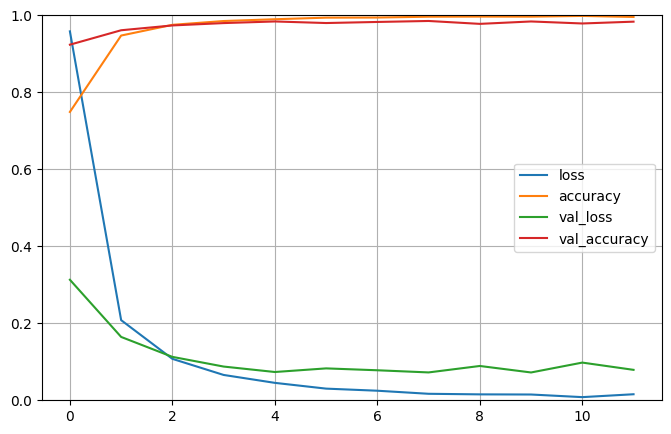

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [13]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
start = time.time()
test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [14]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 85ms/step

1
Predicted :End of speed limit (80km/h) With Confidence: 0.73262614
True Value: Speed limit (30km/h)



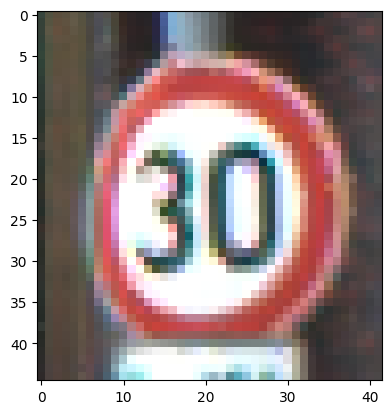

In [15]:
img_index = 1
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)

1/1 [==============================] - 0s 16ms/step

11
Predicted :Priority road With Confidence: 0.8297897
True Value: Right-of-way at intersection



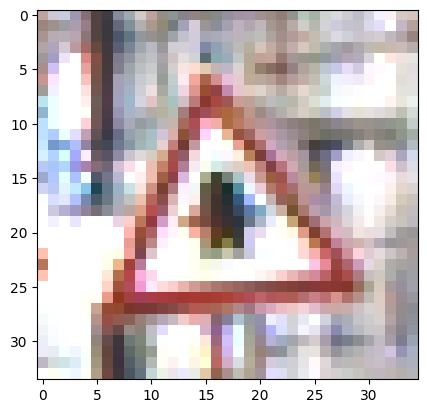

In [16]:
img_index = 25
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)

1/1 [==============================] - 0s 27ms/step

20
Predicted :Dangerous curve right With Confidence: 0.7959057
True Value: Dangerous curve right



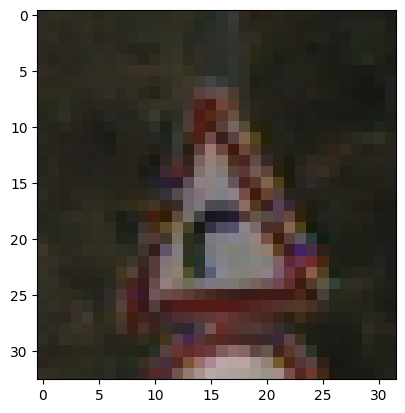

In [25]:
img_index = 17
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)

1/1 [==============================] - 0s 44ms/step

9
Predicted :No passing With Confidence: 0.8826921
True Value: No passing



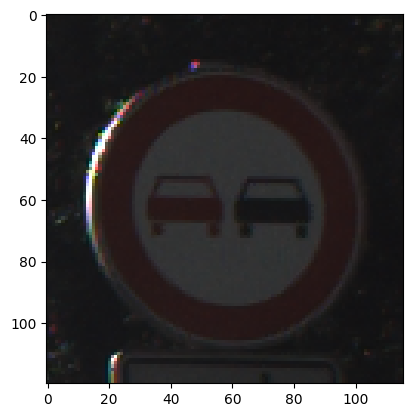

In [28]:
img_index = 22
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)

1/1 [==============================] - 0s 17ms/step

38
Predicted :Dangerous curve right With Confidence: 0.5641878
True Value: Keep right



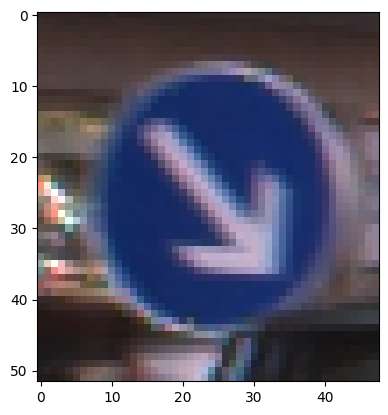

In [19]:
img_index = 2
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)

1/1 [==============================] - 0s 23ms/step

38
Predicted :Dangerous curve right With Confidence: 0.5641878
True Value: Keep right



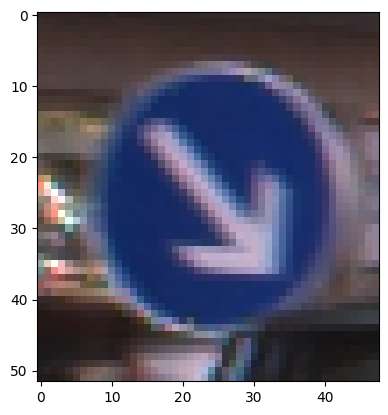

In [20]:
img_index = 2
image = Image.open("./DATA/"+test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
    
prediction = model.predict(img)    
prediction_max = np.argmax(prediction)    
prediction_label = classes[prediction_max]    
confidence = np.max(prediction)  
print()

print(labels[img_index])
print("Predicted :"+ str(prediction_label)+ " With Confidence: "+ str(confidence))
print("True Value: "+str(classes[labels[img_index]]))
print()
plt.imshow(image)